# Sales Analysis

#### Import necessary libraries

In [1]:
import os
from itertools import combinations
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Merge data from each month into one CSV

In [2]:
path = './Sales_Data'
files = [file for file in os.listdir(path) if not file.startswith('.')]

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + '/' + file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv('all_data_copy.csv', index=False)

#### Read in updated dataframe

In [3]:
all_data = pd.read_csv('all_data_copy.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data

#### Dropping NaN values

In [4]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
display(all_data.head(3))

all_data.isnull().sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Get rid of text in "Order Date" column

In [6]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Make columns correct type

In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [8]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

#### Add month column

In [9]:
all_data['Month'] = all_data['Order Date'].dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add "City" column

In [10]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Add time columns

In [11]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27


#### Add "Sales" column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX),8,46,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),22,30,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),9,27,11.99


## Data Exploration!

#### Q1: What was the best month for sales? How much was earned that month?

In [13]:
q1_results = all_data.groupby('Month').sum()
q1_results.iloc[:, 4:6]

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


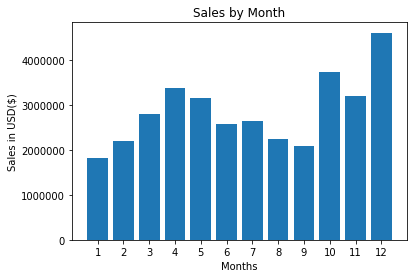

In [14]:
months = range(1,13)

plt.bar(months, q1_results['Sales'])

plt.title('Sales by Month')
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel('Sales in USD($)')
plt.xticks(np.arange(min(months), max(months) + 1, 1.0))
plt.xlabel('Months')

plt.show()

#### Q2: What city sold the most product?

In [15]:
q2_results = all_data.groupby('City').sum()
q2_results.sort_values(by=['Sales'], inplace=True, ascending=True)
q2_results.iloc[:, 5:6]

,Sales
City,
Portland (ME),449758.27
Austin (TX),1819581.75
Portland (OR),1870732.34
Seattle (WA),2747755.48
Dallas (TX),2767975.40
Atlanta (GA),2795498.58
Boston (MA),3661642.01
New York City (NY),4664317.43
Los Angeles (CA),5452570.80


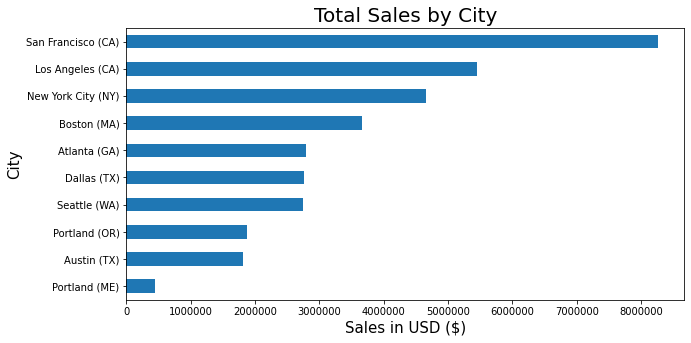

In [16]:
q2_results['Sales'].plot(kind='barh', figsize=(10,5))

plt.title('Total Sales by City', fontsize=20)
plt.ticklabel_format(axis='x', style='plain')
plt.ylabel('City', fontsize=15)
plt.xlabel('Sales in USD ($)', fontsize=15)

plt.show()

#### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

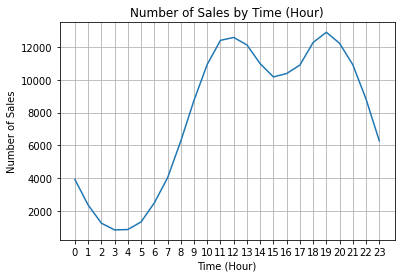

In [17]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Order ID'])

plt.title('Number of Sales by Time (Hour)')
plt.ylabel('Number of Sales')
plt.xticks(np.arange(min(keys), max(keys)+1, 1.0))
plt.xlabel('Time (Hour)')
plt.grid()
plt.show()

# Probably before 10a.m. and 6.p.m.

#### Q4: What products are most often sold together?

In [18]:
df = all_data[all_data['Order ID'].duplicated(keep=False)] #Keep only duplicated "Order ID"s
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute,Sales
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,11.99
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42,600.00
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42,11.95
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,31,99.99


In [19]:
# Group by 'Order ID', select the 'Product' column, apply function to combine products
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\Lucks\AppData\Local\Temp/ipykernel_25476/1565163131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Minute,Sales,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,600.00,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),14,38,11.99,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42,600.00,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),19,42,11.95,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston (MA),11,31,99.99,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [20]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What product sold the most? Why do you think it sold the most?

In [22]:
product_group = all_data.groupby('Product').sum()['Quantity Ordered'].sort_values()
product_group

Product
LG Dryer                        646
LG Washing Machine              666
Vareebadd Phone                2068
20in Monitor                   4129
ThinkPad Laptop                4130
Macbook Pro Laptop             4728
Flatscreen TV                  4819
Google Phone                   5532
34in Ultrawide Monitor         6199
27in 4K Gaming Monitor         6244
iPhone                         6849
27in FHD Monitor               7550
Bose SoundSport Headphones    13457
Apple Airpods Headphones      15661
Wired Headphones              20557
Lightning Charging Cable      23217
USB-C Charging Cable          23975
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Name: Quantity Ordered, dtype: int32

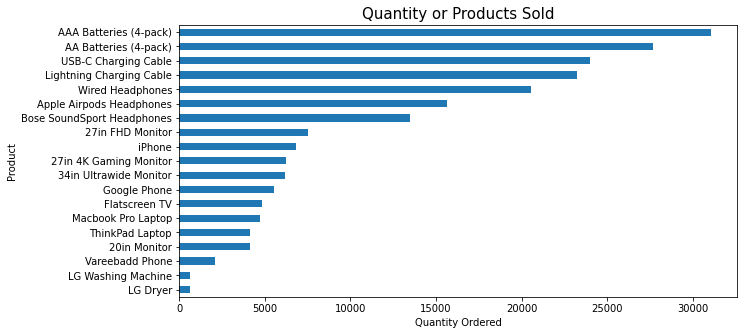

In [23]:
product_group.plot(kind='barh', figsize=(10,5))

plt.title('Quantity or Products Sold', fontsize=15)
plt.ylabel('Product', fontsize=10)
plt.xlabel('Quantity Ordered', fontsize=10)

plt.show()

In [24]:
# Referenced: https://stackoverflow.com/questions/48909110/python-pandas-mean-and-sum-groupby-on-different-columns-at-the-same-time
col_names = {'Quantity Ordered' : 'Quantity Ordered', 'Price Each' : 'Price'}
agg_df = all_data.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each' : 'mean'}).sort_values(by='Quantity Ordered').rename(columns=col_names)
print(agg_df)

                            Quantity Ordered    Price
Product                                              
LG Dryer                                 646   600.00
LG Washing Machine                       666   600.00
Vareebadd Phone                         2068   400.00
20in Monitor                            4129   109.99
ThinkPad Laptop                         4130   999.99
Macbook Pro Laptop                      4728  1700.00
Flatscreen TV                           4819   300.00
Google Phone                            5532   600.00
34in Ultrawide Monitor                  6199   379.99
27in 4K Gaming Monitor                  6244   389.99
iPhone                                  6849   700.00
27in FHD Monitor                        7550   149.99
Bose SoundSport Headphones             13457    99.99
Apple Airpods Headphones               15661   150.00
Wired Headphones                       20557    11.99
Lightning Charging Cable               23217    14.95
USB-C Charging Cable        

C:\Users\Lucks\AppData\Local\Temp/ipykernel_25476/1138066320.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


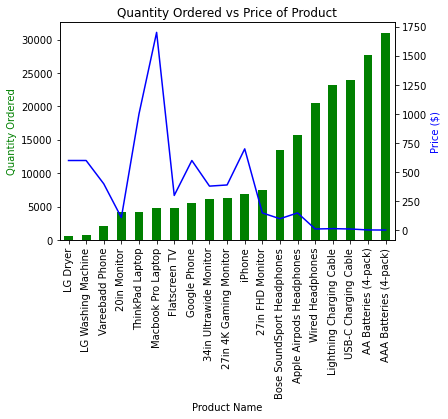

In [25]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
prices = agg_df['Price']
# keys = [pair for pair, df in agg_df]

fig, ax1 = plt.subplots()

ax1 = product_group.plot(kind='bar', color='g')
ax2 = ax1.twinx()
ax2 = prices.plot(kind='line', color='b')

ax1.set_title('Quantity Ordered vs Price of Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xlabel('Product Name')

fig.show()